In [1]:
# Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
path = r'C:\Users\Niklas Winter\Instacart Basket Analysis'

In [3]:
# Importing data set
df_merged = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'ords_prods_custs_merged.pkl'))


In [4]:
df_merged.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,...,order_frequency_flag,first_name,last_name,Gender,state,Age,date_joined,no_of_dependents,marital_status,income
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,...,Frequent customer,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,30,6,17,...,Frequent customer,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620
2,907,Premium Sliced Bacon,106,12,20.0,3160996,138,1,5,13,...,Frequent customer,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620
3,907,Premium Sliced Bacon,106,12,20.0,2254091,138,10,5,14,...,Frequent customer,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620
4,1000,Apricots,18,10,12.9,505689,138,9,6,12,...,Frequent customer,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620


## 3. Create Histogram

<AxesSubplot:ylabel='Frequency'>

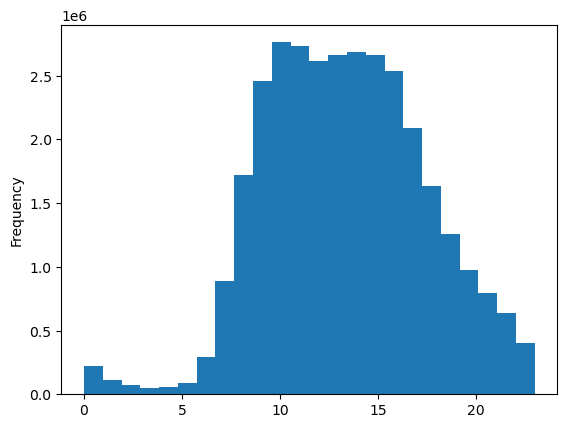

In [5]:
df_merged['order_hour_of_day'].plot.hist(bins = 24)

### The above histogram shows the number of  hours of the day (0 - 23 hour) and the total amount of orders placed for each hour (in millions)"

In [6]:
# Check accuracy of histogram
df_merged['order_hour_of_day'].value_counts(dropna=False).sort_index()

0      218769
1      115700
2       69375
3       51281
4       53242
5       87961
6      290493
7      891054
8     1718118
9     2454203
10    2761760
11    2736140
12    2618532
13    2660954
14    2689136
15    2662144
16    2535202
17    2087654
18    1636502
19    1258305
20     976156
21     795637
22     634225
23     402316
Name: order_hour_of_day, dtype: int64

## 4. The marketing team is curious about the distribution of orders among customers in terms of loyalty. Create a bar chart from the “loyalty_flag” column.

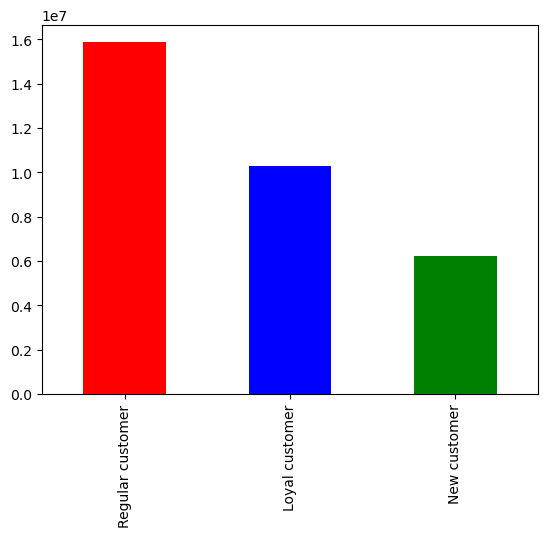

In [7]:
# Create bar chart
loyalty_bar = df_merged['loyalty_flag'].value_counts().plot.bar(color = ['red', 'blue', 'green'])

In [8]:
# Saving loyalty_bar
loyalty_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'loyalty_bars_customer.png'))

### 5. Check whether there's a difference in expenditure depending on the hour of the day.

In [9]:
len(df_merged)

32404859

In [10]:
# Create Sampling Data
np.random.seed(32404859)

In [11]:
dev = np.random.rand(len(df_merged)) <= 0.7

In [12]:
small = df_merged[~dev]

In [13]:
df_prices_hour = small[['order_hour_of_day', 'prices']]

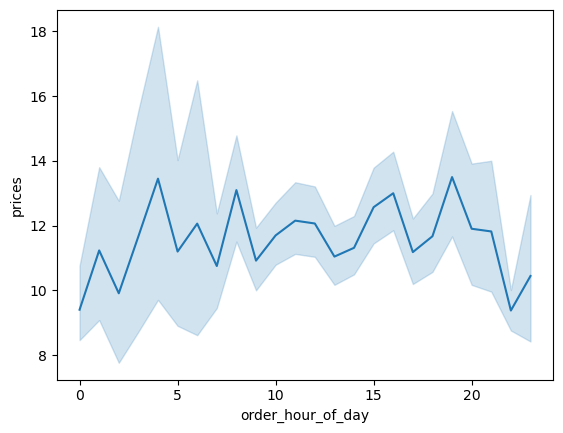

In [14]:
# Create line chart
line = sns.lineplot(data = df_prices_hour, x = 'order_hour_of_day', y = 'prices')

In [15]:
# Saving line chart
line.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'line_order_hour_prices.png'))

## 6. First, determine whether there’s a connection between age and family situation by creating a line chart exploring the connections between age and number of dependents.

In [17]:
# using the splitted data of 30 % and selecting the right columns
df_fam_status_age = small [['no_of_dependents', 'Age']]

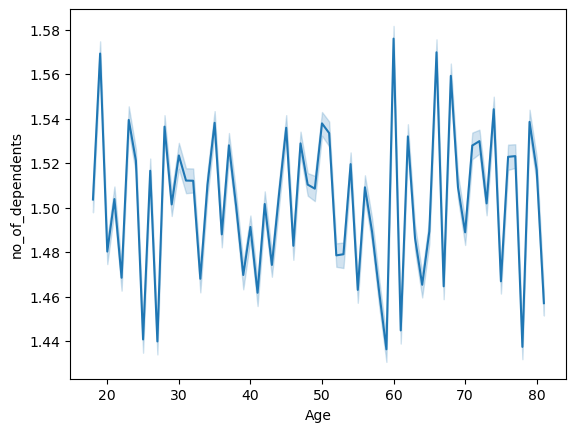

In [18]:
line_3 = sns.lineplot(data = df_fam_status_age, x = 'Age', y = 'no_of_dependents')

### The line chart shows the relationship between customer's age and the number of dependents in each family.

In [22]:
# Saving line chart
line_3.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'line_rel_age_no_dependents.png'))

## 7. You’ll also need to explore whether there’s a connection between age and spending power (income). 

In [19]:
# Create Scatterplot
df_income_age = small [['income', 'Age']]


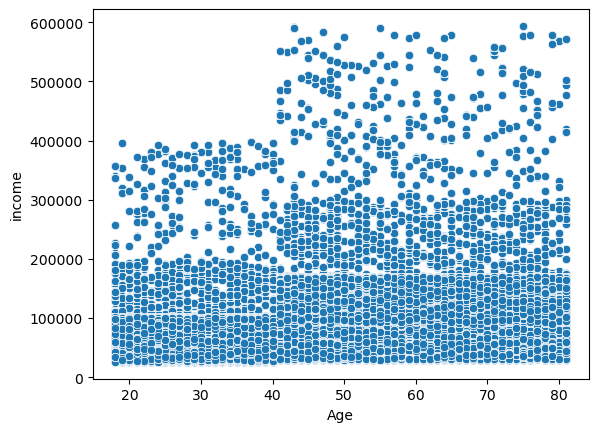

In [21]:
plot_spending = sns.scatterplot(x = 'Age', y = 'income', data = df_income_age)

In [23]:
# Saving line chart
plot_spending.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'plot_rel_income_age'))

## Key points noted from the scatter plot 
### 1. There are large concetration of customers across all ages that earns up to 200,000 pounds.
### 2. Customers aged 40 years and older are earning more  (up to 600,000 USD).
#### In conclusion, instacart customers 40 years and above might spend more base on their higher income earnings.